## Addition of two numbers using ML

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('dataset.csv')

In [3]:
data
#this data format is regression and supervise learning .

,x,y,sum
0,1.0,1.0,2.0
1,2.0,2.0,4.0
2,4.0,4.0,8.0
3,6.0,6.0,12.0
4,7.0,7.0,14.0
5,10.0,10.0,20.0
6,14.0,14.0,28.0
7,21.0,21.0,42.0
8,25.1,27.7,52.8
9,18.1,41.1,59.2


In [4]:
data.head()

,x,y,sum
0,1.0,1.0,2.0
1,2.0,2.0,4.0
2,4.0,4.0,8.0
3,6.0,6.0,12.0
4,7.0,7.0,14.0


In [5]:
data.tail()

,x,y,sum
13,97.4,12.5,109.9
14,65.0,49.0,114.0
15,100.0,200.0,300.0
16,216.0,234.0,450.0
17,287.0,567.0,854.0


In [6]:
data.shape
#to identify raws and columns

(18, 3)

In [7]:
#to check missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       18 non-null     float64
 1   y       18 non-null     float64
 2   sum     18 non-null     float64
dtypes: float64(3)
memory usage: 564.0 bytes


In [8]:
import matplotlib.pyplot as plt

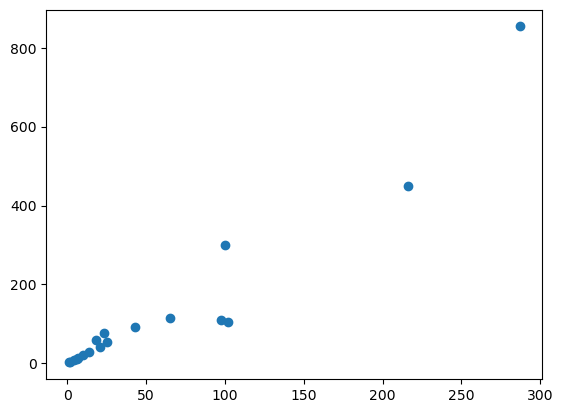

In [9]:
plt.scatter(data['x'], data['sum'])

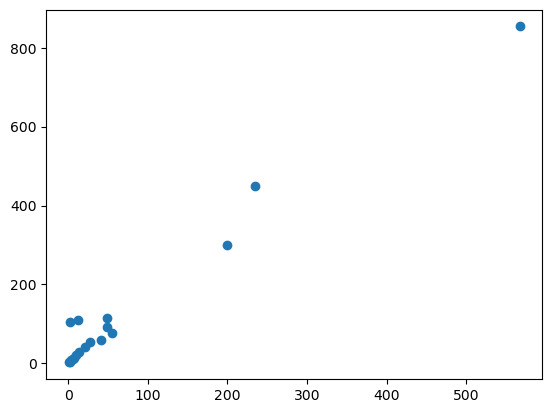

In [10]:
plt.scatter(data['y'] , data['sum'])

#### According to the EDA process we decide using the graph, the suitable algorithm is linear regression. to store inputs data in variable X and outputs in variable Y.because before we are gonna use machine learning model,these should be store in the model.

In [11]:
X = data[['x' , 'y']]
Y = data['sum']

In [12]:
from sklearn.model_selection import train_test_split
#to get doctring we use below code and in paranthesis enter shift + tab
#train_test_split()

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.33, random_state=42)

#the mean is 33% test and training is 67%.to stop to shuple our data set we use random_states.otherwise if we remove this always output is change.0.33 and 42 are default values.

In [14]:
X_train
#this is training dataset

,x,y
16,216.0,234.0
15,100.0,200.0
11,43.0,49.0
2,4.0,4.0
9,18.1,41.1
17,287.0,567.0
4,7.0,7.0
12,102.0,3.0
7,21.0,21.0
10,23.3,54.5


In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train , Y_train)

#now our model is training under linearRegression method

LinearRegression()

In [16]:
model.score(X_train , Y_train)
#tocheck accuracy.

1.0

In [17]:
model.score(X_test , Y_test)

1.0

In [18]:
Y_pred = model.predict(X_test)
#to get prediction values

In [19]:
Y_pred

array([  2. ,   4. ,  52.8,  20. ,  12. , 109.9])

In [20]:
Y_test

0       2.0
1       4.0
8      52.8
5      20.0
3      12.0
13    109.9
Name: sum, dtype: float64

In [21]:
df = pd.DataFrame({'Actual' : Y_test , 'Prediction' :Y_pred})

In [22]:
df
#to confirm actual value and prediction value is equal

,Actual,Prediction
0,2.0,2.0
1,4.0,4.0
8,52.8,52.8
5,20.0,20.0
3,12.0,12.0
13,109.9,109.9


In [23]:
model.predict([[34.1,115]])
#prediction for new sample

C:\Users\DJ\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([149.1])

In [24]:
model.predict([[123,215]])

C:\Users\DJ\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([338.])

#### To save the model

In [25]:
import joblib

In [26]:
joblib.dump(model ,'model_joblib')

['model_joblib']

#### to load the model

In [27]:
model = joblib.load('model_joblib')

In [28]:
#prediction
model.predict([[34.1,115]])

C:\Users\DJ\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([149.1])

#### Trining for the entire data set

In [29]:
X = data[['x', 'y']]
Y = data['sum']

In [30]:
model =LinearRegression()
model.fit(X,Y)

LinearRegression()

#### now save the whole trained data set to transfer for production

In [31]:
import joblib
joblib.dump(model , 'model_joblib')
model = joblib.load('model_joblib')
model.predict([[23,45]])

C:\Users\DJ\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([68.])

### Create an GUI

In [32]:
from tkinter import*
import joblib

In [33]:
#create an instance of tkinter
master = Tk()

In [34]:
master.title("Addition of two numbers using ML")

''

In [35]:
Label = Label(master,text = "Addition of two numbers using ML" , bg ='black' ,fg ='white').grid(row =0,columnspan =2)

### Applying lables

In [36]:
def show_entry_field():
    p1 = float(e1.get())
    p2 = float(e2.get())

    model = joblib.load('model_joblib')
    result = model.predict([[p1,p2]])

    Label(master,text='sum is =' ).grid(row=4)
    Label(master,text= result ).grid(row=5)

    print("sum is" , result)


In [37]:
def show_entry_field():
    Label(master,text= "Enter first number").grid(row =1)
    Label(master, text ="Enter second number").grid(row=2)
    
    e1 =Entry(master)
    e2 =Entry(master)
    
    e1.grid(row=1,column =1)
    e2.grid(row =2, column =1)
        
    Button(master,text='predict', command =show_entry_fields).grid()
    mainloop()